In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
#import pandas_profiling as pf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn.metrics as sklm
import time
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)
%matplotlib inline

In [2]:
# Read the data and display some information about it
training_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
display(training_data.head())
display(training_data.info());

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


None

In [4]:
#data_profile = pf.ProfileReport(training_data )
#data_profile.to_file('train_profile.html')

In [3]:
# Convert column to date time
training_data['TransactionStartTime'] =  pd.to_datetime(training_data['TransactionStartTime'])
test_data['TransactionStartTime'] = pd.to_datetime(test_data['TransactionStartTime'])

In [4]:
training_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null datetime64[ns, UTC]
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(10)
memory usage: 11.7+ MB


In [6]:
#Extract day from datetime column
training_data['day'] = training_data['TransactionStartTime'].dt.strftime("%d").astype(int)
test_data['day'] = test_data['TransactionStartTime'].dt.strftime("%d").astype(int)

In [7]:
#Extract month from datetime column
training_data['month'] = training_data['TransactionStartTime'].dt.strftime("%m").astype(int)
test_data['month'] = test_data['TransactionStartTime'].dt.strftime("%m").astype(int)

In [8]:
#Extract hour of day from datetime column
training_data['hour'] = training_data['TransactionStartTime'].dt.strftime("%H").astype(int)
test_data['hour'] = test_data['TransactionStartTime'].dt.strftime("%H").astype(int)

In [9]:
training_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,day,month,hour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,15,11,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,15,11,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,15,11,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,15,11,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,15,11,3


In [10]:
#Check for missing values
training_data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
day                     0
month                   0
hour                    0
dtype: int64

In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 19 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null datetime64[ns, UTC]
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
day                     95662 non-null int64
month                   95662 non-null int64
hour                    95662 non-null int64
dtypes: da

In [12]:
#Check if data is imbalanced : It is highly imbalanced
training_data['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [13]:
X = training_data.drop(columns=['FraudResult', 'AccountId', 'BatchId', 'CountryCode', 'CurrencyCode', 'CustomerId', 'SubscriptionId', 'TransactionStartTime', 'TransactionId'])

test_data = test_data.drop(columns=['AccountId', 'BatchId', 'CountryCode', 'CurrencyCode', 'CustomerId', 'SubscriptionId', 'TransactionStartTime', 'TransactionId'])
y = training_data['FraudResult']

In [14]:
print(X.shape)
print(test_data.shape)

(95662, 10)
(45019, 10)


In [15]:
X.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,day,month,hour
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,15,11,2
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,15,11,2
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,15,11,2
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,15,11,3
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,15,11,3


In [16]:
test_data.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,day,month,hour
0,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,13,2,10
1,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2,13,2,10
2,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,13,2,10
3,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,4,13,2,10
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2,13,2,10


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudResult, dtype: int64

In [18]:
# Scikit-learn's implementation of RandomForest cannot handle non-numeric categorical variables
# So use OrdinalEncoder to convert all the categorical variables to numbers

OrdinalEncoder()
X_enc = OrdinalEncoder().fit_transform(X)
test = OrdinalEncoder().fit_transform(test_data)

In [19]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.25)

In [21]:
#applyting SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE

In [22]:
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(143200, 10) (143200,)
71600 71600


In [23]:
# Build a Random Forest model with 10 decision_trees and train it on the the data
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X_sm,y_sm)

In [24]:
# predict the labels for the test_data using the trained model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

Accuracy: 0.9994982438534872
Recall: 0.9361702127659575
Precision: 0.8301886792452831
f1_score: 0.88


In [25]:
y_rf_prob=clf.predict_proba(X_test)[:,1]

In [26]:
from sklearn import metrics

Confusion Matrix:
 [[23860     9]
 [    3    44]]
Accuracy:
 0.9994982438534872
Precision:
 0.8301886792452831
Recall:
 0.9361702127659575
AUC:
 0.9890835883452497


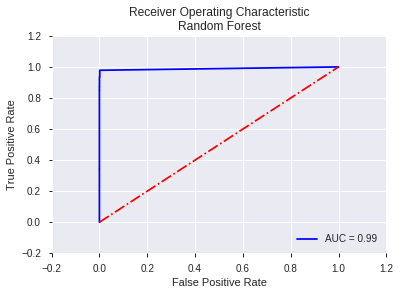

In [27]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
y_test.value_counts()

0    23869
1       47
Name: FraudResult, dtype: int64

In [29]:
submit = clf.predict(test)

In [30]:
type(submit)

numpy.ndarray

In [31]:
submission = pd.read_csv('sample_submission.csv')

In [32]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN


In [33]:
submission['FraudResult'] = submit

In [34]:
submission['FraudResult'] = submission['FraudResult'].astype(int)

In [35]:
type(submission['FraudResult'])

pandas.core.series.Series

In [36]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [41]:
#submission['TransactionId'] = test_data['TransactionId']

In [37]:
submission.to_csv('results2.csv', index=False, header=True)

In [38]:
a = pd.read_csv('results2.csv')

In [39]:
type(a['FraudResult'])

pandas.core.series.Series

In [40]:
a.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0
